Route: [0, 3, 2, 5, 4, 1, 0]
Total distance: 138.77


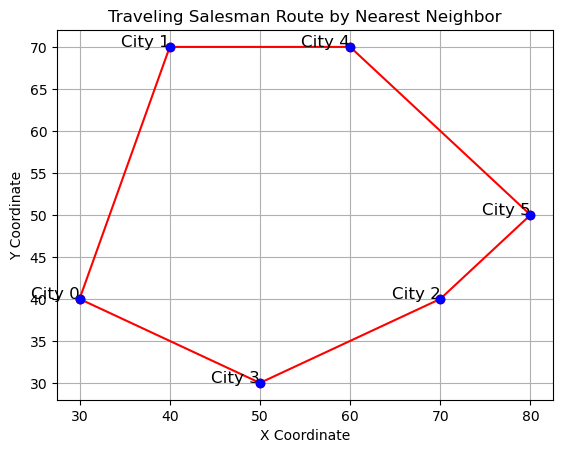

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(c1, c2):
    return np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)

def nearest_neighbor(coordinates):
    """
    Solves the TSP using the nearest neighbor algorithm.
    
    :param coordinates: numpy array of shape (n, 2) where n is the number of cities
    :returns: Tuple (route, distance) where route is the list of visited cities in order
             and distance is the total length of the tour.
    """
    n = len(coordinates)
    visited = np.zeros(n, dtype=bool)
    route = []
    total_distance = 0
    current_city = 0
    route.append(current_city)
    visited[current_city] = True

    for _ in range(n - 1):
        nearest_city = None
        min_distance = np.inf
        for city in range(n):
            if not visited[city]:
                distance = euclidean_distance(coordinates[current_city], coordinates[city])
                if distance < min_distance:
                    min_distance = distance
                    nearest_city = city
        visited[nearest_city] = True
        route.append(nearest_city)
        total_distance += min_distance
        current_city = nearest_city
    
    # Return to the starting city
    total_distance += euclidean_distance(coordinates[route[-1]], coordinates[route[0]])
    route.append(route[0])  # close the loop

    return route, total_distance

def plot_route(coordinates, route):
    """
    Plots the TSP route on a 2D plane.
    """
    route_coords = coordinates[route]
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', zorder=5)
    plt.plot(route_coords[:, 0], route_coords[:, 1], color='red', linestyle='-', marker='o')
    for i, coord in enumerate(coordinates):
        plt.text(coord[0], coord[1], f'City {i}', fontsize=12, ha='right')
    plt.title('Traveling Salesman Route by Nearest Neighbor')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

# Example coordinates
coordinates = np.array([
    [30, 40],  # City 0
    [40, 70],  # City 1
    [70, 40],  # City 2
    [50, 30],  # City 3
    [60, 70],  # City 4
    [80, 50]   # City 5
])

# Solve the TSP using the Nearest Neighbor algorithm
route, distance = nearest_neighbor(coordinates)
print(f"Route: {route}")
print(f"Total distance: {distance:.2f}")

# Plot the route
plot_route(coordinates, route)


Starting from city 0: Route = [0, 3, 2, 5, 4, 1, 0], Total distance = 138.77


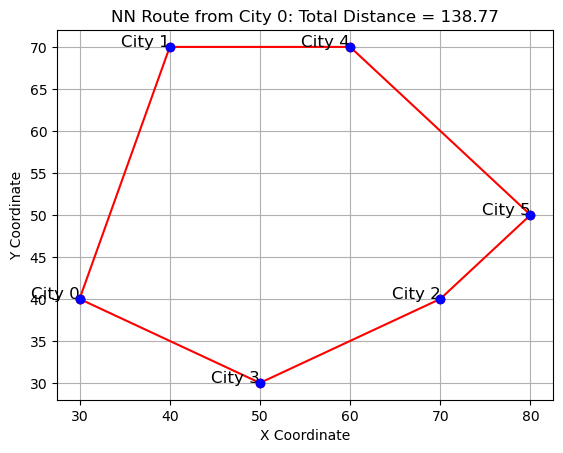

Starting from city 1: Route = [1, 4, 5, 2, 3, 0, 1], Total distance = 138.77


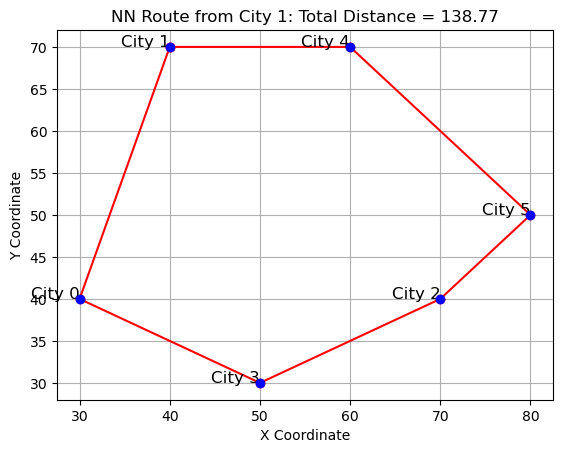

Starting from city 2: Route = [2, 5, 4, 1, 0, 3, 2], Total distance = 138.77


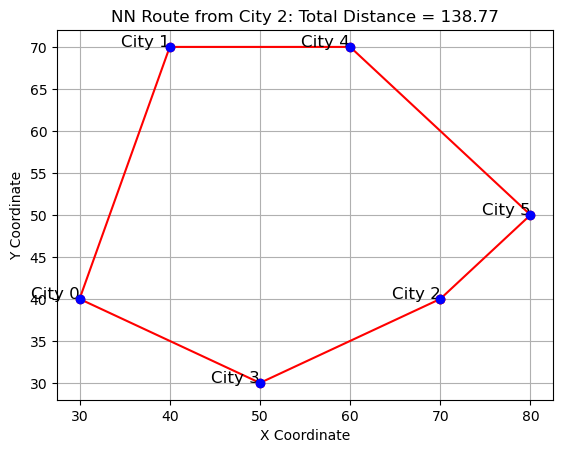

Starting from city 3: Route = [3, 0, 1, 4, 5, 2, 3], Total distance = 138.77


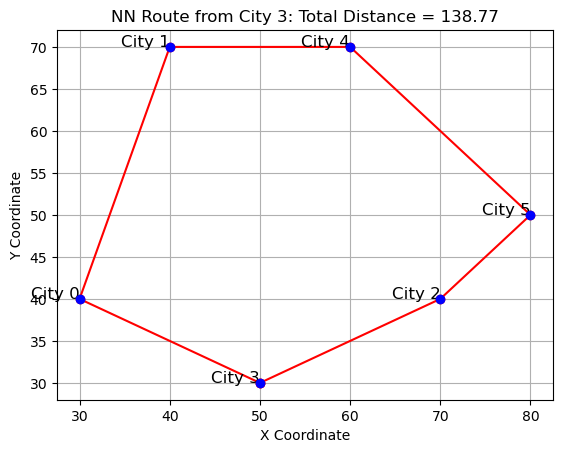

Starting from city 4: Route = [4, 1, 0, 3, 2, 5, 4], Total distance = 138.77


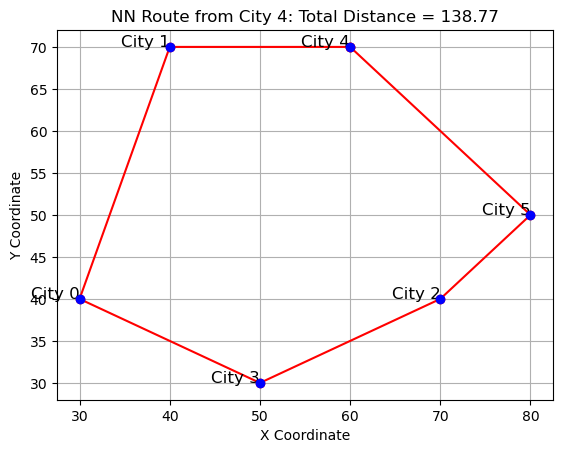

Starting from city 5: Route = [5, 2, 3, 0, 1, 4, 5], Total distance = 138.77


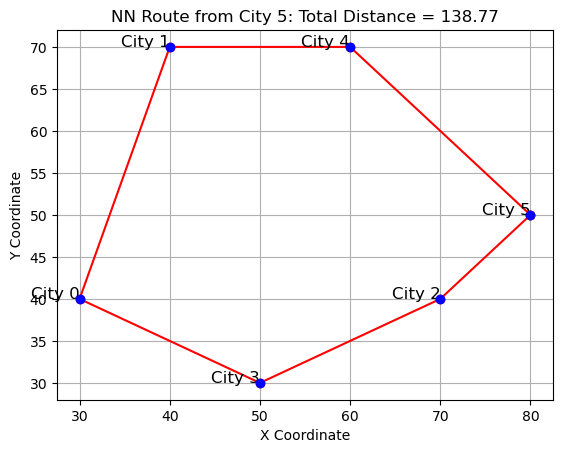

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(c1, c2):
    return np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)

def nearest_neighbor(coordinates, start=0):
    """
    Solves the TSP using the nearest neighbor algorithm starting from a given city.
    
    :param coordinates: numpy array of shape (n, 2) where n is the number of cities.
    :param start: the index of the starting city.
    :returns: Tuple (route, distance) where route is the list of visited cities in order,
              and distance is the total length of the tour.
    """
    n = len(coordinates)
    visited = np.zeros(n, dtype=bool)
    route = [start]
    total_distance = 0
    current_city = start
    visited[current_city] = True

    for _ in range(n - 1):
        nearest_city = None
        min_distance = np.inf
        for city in range(n):
            if not visited[city]:
                distance = euclidean_distance(coordinates[current_city], coordinates[city])
                if distance < min_distance:
                    min_distance = distance
                    nearest_city = city
        visited[nearest_city] = True
        route.append(nearest_city)
        total_distance += min_distance
        current_city = nearest_city
    
    # Return to the starting city
    total_distance += euclidean_distance(coordinates[route[-1]], coordinates[start])
    route.append(start)  # close the loop

    return route, total_distance

def plot_route(coordinates, route, total_distance):
    route_coords = coordinates[route]
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', zorder=5)
    plt.plot(route_coords[:, 0], route_coords[:, 1], color='red', linestyle='-', marker='o')
    for i, coord in enumerate(coordinates):
        plt.text(coord[0], coord[1], f'City {i}', fontsize=12, ha='right')
    plt.title(f'NN Route from City {route[0]}: Total Distance = {total_distance:.2f}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

# Example coordinates
coordinates = np.array([
    [30, 40],  # City 0
    [40, 70],  # City 1
    [70, 40],  # City 2
    [50, 30],  # City 3
    [60, 70],  # City 4
    [80, 50]   # City 5
])

# Execute NN from each city and plot routes
for start_city in range(len(coordinates)):
    route, distance = nearest_neighbor(coordinates, start=start_city)
    print(f"Starting from city {start_city}: Route = {route}, Total distance = {distance:.2f}")
    plot_route(coordinates, route, distance)
